,ID,split,No. Words,V01,Comment,Topic,Domain,Genre,Formality,(non)Public,...,Ob?ina snemanja,Prostor snemanja,Velikost prostora,Prisotnost šuma,Presluh,Pogost hkratni govor,Format izvornega posnetka,Vir,Spletna povezava do posnetka,subcorpus
0,Artur-J-Gvecg-P500001,Dev,821,1.0,NaN,Mediji in govorjena slovenš?ina,Mediji,Strokovna konferenca,formalno,javno,...,Ljubljana,Odprti prostor,Nad 80 m2,Ne,Ne,Ne,WAV,STA,https://www.facebook.com/watch/live/?v=3393330...,J
1,Artur-J-Gvecg-P500002,Train,732,NaN,NaN,Mediji in govorjena slovenš?ina,Mediji,Strokovna konferenca,formalno,javno,...,Ljubljana,Odprti prostor,Nad 80 m2,Ne,Ne,Ne,WAV,STA,https://www.facebook.com/watch/live/?v=3393330...,J
2,Artur-J-Gvecg-P500014,Eval,827,NaN,NaN,Organizacije za pomo? osebam z rakom in drugi ...,Zdravje,Okrogla miza,formalno,javno,...,Ljubljana,unspecified,unspecified,Ne,Ne,Ne,M4A,STA,https://livestream.com/accounts/564247/events/...,J
3,Artur-J-Gvecg-P500016,Train,843,NaN,NaN,Informacije o zdravljenju kroni?nih bolezni,Zdravje,Okrogla miza,formalno,javno,...,Ljubljana,unspecified,unspecified,Ne,Ne,Ne,M4A,STA,https://www.youtube.com/watch?v=fTymM6UTB0M&fe...,J
4,Artur-J-Gvecg-P500021,Train,820,NaN,NaN,Antibiotiki,Zdravje,Okrogla miza,formalno,javno,...,Ljubljana,unspecified,Do 20 m2,Ne,Ne,Ne,M4A,STA,https://livestream.com/accounts/564247/events/...,J


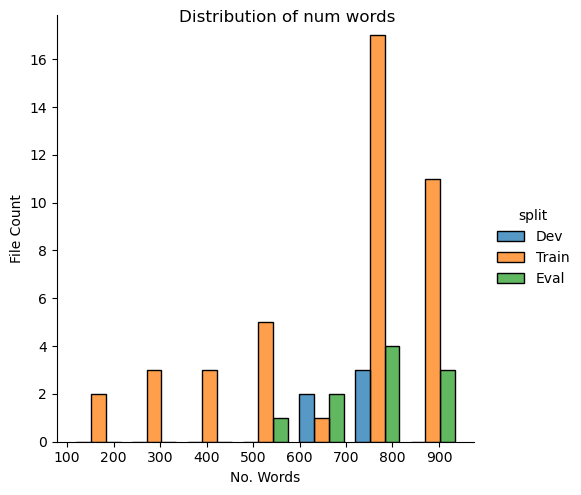

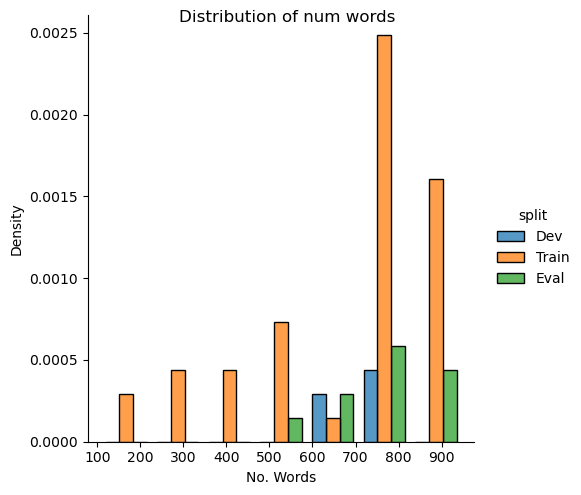

In [1]:
import pandas as pd
import seaborn as sns

df = pd.read_csv(
    "../IRISS-train-dev-test-splits.csv", sep=";", nrows=57, encoding="cp1250"
).rename(columns={"Recording ID": "ID", "Train/Dev/Eval": "split"})
df["split"] = df.split.fillna("Train")
df["subcorpus"] = df.ID.str.split("-").str[1]
f = sns.displot(
    df,
    x="No. Words",
    hue="split",
    stat="count",
    shrink=0.8,
    multiple="dodge",
    common_norm=True,
)
f.figure.suptitle("Distribution of num words")
f.set_ylabels("File Count")

f = sns.displot(
    df,
    x="No. Words",
    hue="split",
    stat="density",
    shrink=0.8,
    multiple="dodge",
    common_norm=True,
)
f.figure.suptitle("Distribution of num words")
df.head()

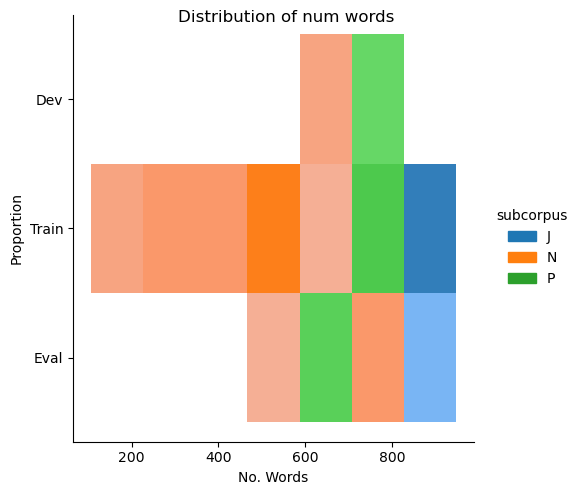

In [2]:
f = sns.displot(
    df,
    x="No. Words",
    y="split",
    hue="subcorpus",
    # stat="density",
    # shrink=0.8,
    # multiple="dodge",
    # common_norm=False,
)
f.figure.suptitle("Distribution of num words")
f.set_ylabels("Proportion")

,file,start_ms,end_ms,duration,annotations,split,subcorpus,num_disfl
0,Iriss-N-G6060-P606001.exb.xml,4.174,33.636000,29.462000,[],Eval,N,0
1,Iriss-N-G6060-P606001.exb.xml,18.412,42.459835,24.047835,[],Eval,N,0
2,Iriss-N-G6060-P606001.exb.xml,53.264,83.061000,29.797000,"[{'start_ms': 61.59309394400118, 'end_ms': 61....",Eval,N,3
3,Iriss-N-G6060-P606001.exb.xml,67.324,96.828000,29.504000,"[{'start_ms': 69.45306339523805, 'end_ms': 70....",Eval,N,2
4,Iriss-N-G6060-P606001.exb.xml,83.061,97.645000,14.584000,[],Eval,N,0
...,...,...,...,...,...,...,...,...
1074,Iriss-N-G5014-P600007.exb.xml,99.471,115.586641,16.115641,[],Train,N,0
1075,Iriss-N-G5014-P600007.exb.xml,182.176,195.674000,13.498000,"[{'start_ms': 192.877, 'end_ms': 193.207, 'lab...",Train,N,1
1076,Iriss-N-G5014-P600007.exb.xml,278.685,308.643000,29.958000,"[{'start_ms': 297.702, 'end_ms': 298.012, 'lab...",Train,N,2
1077,Iriss-N-G5014-P600007.exb.xml,292.813,309.682754,16.869754,"[{'start_ms': 297.702, 'end_ms': 298.012, 'lab...",Train,N,2


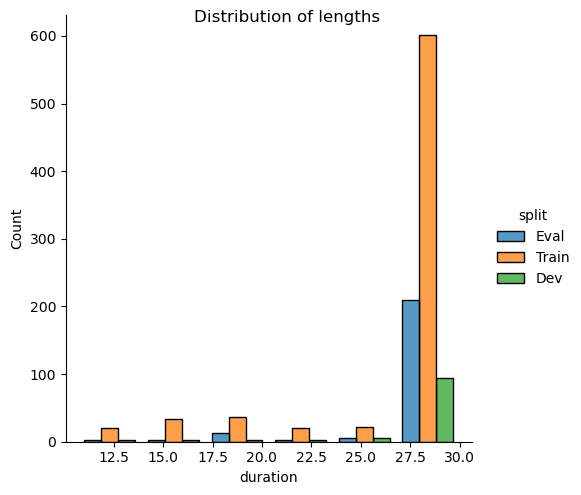

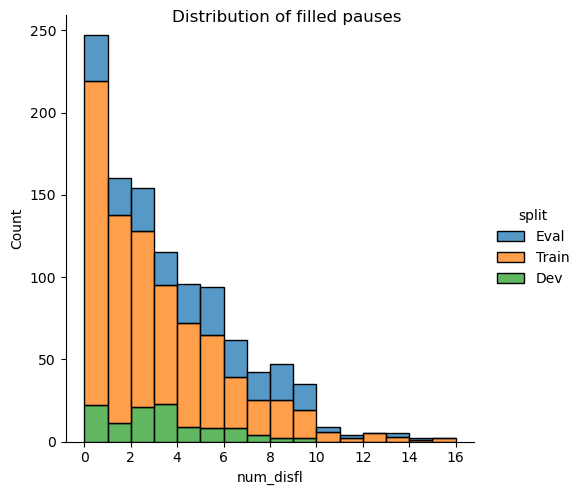

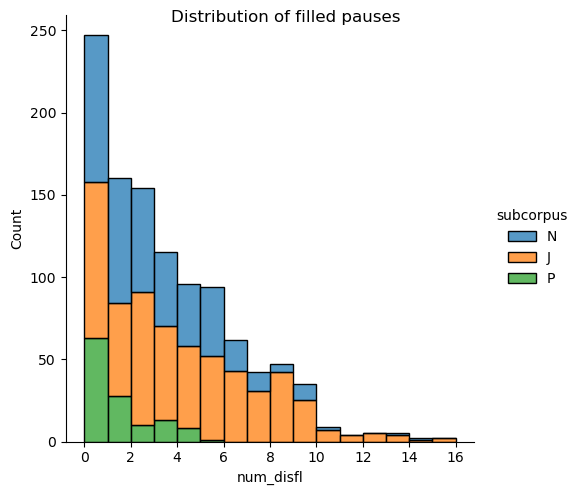

In [3]:
import json
from pathlib import Path

data = [
    json.loads(i) for i in Path("data/filled_pauses.jsonl").read_text().splitlines()
]
new_data = []
for line in data:
    file = line["file"]
    for content in line["strips"]:
        new_data.append({"file": file, **content})
segs = pd.DataFrame(new_data)
segs["matcher"] = segs.file.str.split(".").str[0].str.replace("Iriss", "Artur")
segs = segs.merge(
    df[["ID", "split", "subcorpus"]], left_on="matcher", right_on="ID", how="left"
).drop(columns=["ID", "matcher"])
segs["num_disfl"] = segs.annotations.apply(len)

g = sns.displot(
    segs,
    x="duration",
    hue="split",
    stat="count",
    binwidth=3,
    shrink=0.8,
    multiple="dodge",
    common_norm=False,
)
g.figure.suptitle("Distribution of lengths")
h = sns.displot(
    segs,
    x="num_disfl",
    hue="split",
    stat="count",
    binwidth=1,
    # shrink=0.8,
    multiple="stack",
    common_norm=False,
)
h.figure.suptitle("Distribution of filled pauses")

i = sns.displot(
    segs,
    x="num_disfl",
    hue="subcorpus",
    stat="count",
    binwidth=1,
    # shrink=0.8,
    multiple="stack",
    common_norm=False,
)
i.figure.suptitle("Distribution of filled pauses")

segs

In [4]:
segs.groupby("split").duration.sum() / segs.duration.sum()


split
Dev      0.103435
Eval     0.222789
Train    0.673776
Name: duration, dtype: float64

In [5]:
segs.duration.sum()

30086.22011001823

In [6]:
segs

,file,start_ms,end_ms,duration,annotations,split,subcorpus,num_disfl
0,Iriss-N-G6060-P606001.exb.xml,4.174,33.636000,29.462000,[],Eval,N,0
1,Iriss-N-G6060-P606001.exb.xml,18.412,42.459835,24.047835,[],Eval,N,0
2,Iriss-N-G6060-P606001.exb.xml,53.264,83.061000,29.797000,"[{'start_ms': 61.59309394400118, 'end_ms': 61....",Eval,N,3
3,Iriss-N-G6060-P606001.exb.xml,67.324,96.828000,29.504000,"[{'start_ms': 69.45306339523805, 'end_ms': 70....",Eval,N,2
4,Iriss-N-G6060-P606001.exb.xml,83.061,97.645000,14.584000,[],Eval,N,0
...,...,...,...,...,...,...,...,...
1074,Iriss-N-G5014-P600007.exb.xml,99.471,115.586641,16.115641,[],Train,N,0
1075,Iriss-N-G5014-P600007.exb.xml,182.176,195.674000,13.498000,"[{'start_ms': 192.877, 'end_ms': 193.207, 'lab...",Train,N,1
1076,Iriss-N-G5014-P600007.exb.xml,278.685,308.643000,29.958000,"[{'start_ms': 297.702, 'end_ms': 298.012, 'lab...",Train,N,2
1077,Iriss-N-G5014-P600007.exb.xml,292.813,309.682754,16.869754,"[{'start_ms': 297.702, 'end_ms': 298.012, 'lab...",Train,N,2
